#### Notes
F1 scoring chosen for hyperparameter tuning in order to minimize false positives as well as false negatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import scipy.sparse
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import pickle

### Random Forest hyperparameters

In [2]:
rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':[i for i in range(1,51)],
    'min_samples_leaf':[i for i in range(1,11)],
    'n_estimators':[i for i in range(1,101)],
    'class_weight': ['balanced'],
    'max_features':[None,1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':[i for i in np.arange(0.0,0.35,0.05)],
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[2]
}

### Import data

In [3]:
print('Importing data...')
data_path = r'../data/clean_df.csv.gz'
df = pd.read_csv(data_path)
print('Done.')

print('Engineering features...')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['CASUALTIES?'] = 0
mask = df['TOTAL PEDESTRIAN CASUALTIES'] != 0
df.loc[mask, 'CASUALTIES?'] = 1
df.loc[df['TOTAL PEDESTRIAN CASUALTIES'] != 1, ['TOTAL PEDESTRIAN CASUALTIES','CASUALTIES?']].sample(5)
print('Done.')

Importing data...
Done.
Engineering features...
Done.


### K-Means analysis

Manhattan K-Means analysis
# Clusters: 2
    F1 score: 0.1541123002492303
# Clusters: 3
    F1 score: 0.1621875839828003
# Clusters: 4
    F1 score: 0.16244468182511826
# Clusters: 5
    F1 score: 0.15882567469000727
# Clusters: 6
    F1 score: 0.1605709471810278
# Clusters: 7
    F1 score: 0.16494845360824742
# Clusters: 8
    F1 score: 0.1634797405083484
# Clusters: 9
    F1 score: 0.15778344877870945
# Clusters: 10
    F1 score: 0.1639133137934097
# Clusters: 11
    F1 score: 0.16563576573755087
# Clusters: 12
    F1 score: 0.1668766552672855
# Clusters: 13
    F1 score: 0.16925662453668533
# Clusters: 14
    F1 score: 0.16725885298676524
# Clusters: 15
    F1 score: 0.1679213359162355
# Clusters: 16
    F1 score: 0.1643656761527116
# Clusters: 17
    F1 score: 0.16369999396608942
# Clusters: 18
    F1 score: 0.16507481174821528
# Clusters: 19
    F1 score: 0.1656102769209911
# Clusters: 20
    F1 score: 0.16798979671516698
# Clusters: 21
    F1 score: 0.16556759969433674
# Clusters

<ipython-input-4-b06eb04ef342>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.09454545454545454
# Clusters: 3
    F1 score: 0.09076814658210007
# Clusters: 4
    F1 score: 0.0894412038211176
# Clusters: 5
    F1 score: 0.0910766561856229
# Clusters: 6
    F1 score: 0.09948652118100129
# Clusters: 7
    F1 score: 0.09795918367346938
# Clusters: 8
    F1 score: 0.09749582637729551
# Clusters: 9
    F1 score: 0.09901234567901235
# Clusters: 10
    F1 score: 0.10998051526304396
# Clusters: 11
    F1 score: 0.10924229808492925
# Clusters: 12
    F1 score: 0.10841836734693877
# Clusters: 13
    F1 score: 0.10866324333278117
# Clusters: 14
    F1 score: 0.10948012232415902
# Clusters: 15
    F1 score: 0.11104179663131628
# Clusters: 16
    F1 score: 0.10952528699968973
# Clusters: 17
    F1 score: 0.10925338714326895
# Clusters: 18
    F1 score: 0.11007596388132435
# Clusters: 19
    F1 score: 0.10970724191063173
# Clusters: 20
    F1 score: 0.1089334548769371
# Clusters: 21
    F1 score: 0.10995692931340259
# Clusters: 22
    F1 score: 0.

<ipython-input-4-b06eb04ef342>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.12733928740492947
# Clusters: 3
    F1 score: 0.12647743136342485
# Clusters: 4
    F1 score: 0.12415392625550245
# Clusters: 5
    F1 score: 0.126448258919373
# Clusters: 6
    F1 score: 0.12820512820512822
# Clusters: 7
    F1 score: 0.12856685438758406
# Clusters: 8
    F1 score: 0.12995651061652597
# Clusters: 9
    F1 score: 0.1283862454397268
# Clusters: 10
    F1 score: 0.1279746658594514
# Clusters: 11
    F1 score: 0.13191261583754307
# Clusters: 12
    F1 score: 0.1294084301737053
# Clusters: 13
    F1 score: 0.12774294670846395
# Clusters: 14
    F1 score: 0.12828107445613318
# Clusters: 15
    F1 score: 0.12991683524387504
# Clusters: 16
    F1 score: 0.13454671848832434
# Clusters: 17
    F1 score: 0.13426235245458307
# Clusters: 18
    F1 score: 0.13775641135309918
# Clusters: 19
    F1 score: 0.1363660370050878
# Clusters: 20
    F1 score: 0.1379275053304904
# Clusters: 21
    F1 score: 0.13873191974700608
# Clusters: 22
    F1 score: 0.1376

<ipython-input-4-b06eb04ef342>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.14852952648412512
# Clusters: 3
    F1 score: 0.14443686571174633
# Clusters: 4
    F1 score: 0.14793522059389677
# Clusters: 5
    F1 score: 0.14999849881406313
# Clusters: 6
    F1 score: 0.14613164299054843
# Clusters: 7
    F1 score: 0.14976383164355123
# Clusters: 8
    F1 score: 0.14865702479338844
# Clusters: 9
    F1 score: 0.15371823144499477
# Clusters: 10
    F1 score: 0.1540273891915771
# Clusters: 11
    F1 score: 0.15087099524911682
# Clusters: 12
    F1 score: 0.1496245128172629
# Clusters: 13
    F1 score: 0.15040916021033637
# Clusters: 14
    F1 score: 0.15152680563033613
# Clusters: 15
    F1 score: 0.15440059357665267
# Clusters: 16
    F1 score: 0.15366438475171143
# Clusters: 17
    F1 score: 0.15295201194143615
# Clusters: 18
    F1 score: 0.15332012526362881
# Clusters: 19
    F1 score: 0.15296195408147994
# Clusters: 20
    F1 score: 0.15222444889779557
# Clusters: 21
    F1 score: 0.1535380046275512
# Clusters: 22
    F1 score: 0.

<ipython-input-4-b06eb04ef342>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


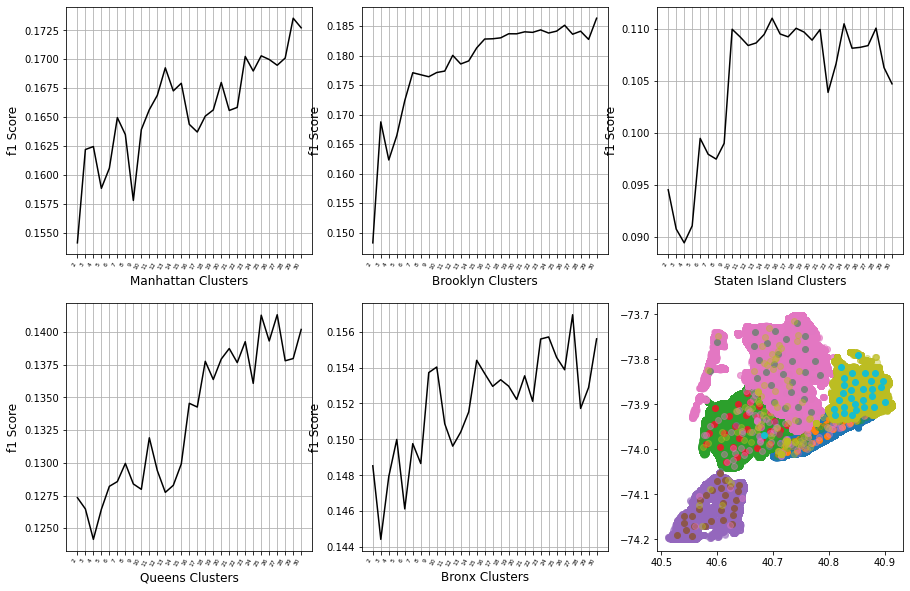

In [4]:
boroughs = ['MANHATTAN','BROOKLYN','STATEN ISLAND','QUEENS','BRONX']
subplots = [231,232,233,234,235]
k_range = range(2,31)

_ = plt.figure(figsize=(15,10))
max_k = {}
for space, current_borough in zip(subplots, boroughs):
    print(f'{current_borough.title()} K-Means analysis')
    borough = df[df['BOROUGH'] == current_borough]
    f1_list = []
    for i in k_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(borough[['LATITUDE','LONGITUDE']].values)
        df_clusters = pd.Series(kmeans.labels_)
        cluster_dummies = pd.get_dummies(df_clusters)
        X = scipy.sparse.csr_matrix(cluster_dummies)
        y = borough['CASUALTIES?']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        log_reg = LogisticRegression(class_weight='balanced', max_iter=10_000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        log_f1 = f1_score(y_test, y_pred)
        print(f'# Clusters: {i}\n    F1 score: {log_f1}')
        f1_list.append(log_f1)
    _ = plt.subplot(space)
    _ = plt.plot(k_range, f1_list, 'k-')
    _ = plt.grid()
    _ = plt.xlabel(f'{current_borough.title()} Clusters', fontsize=12)
    _ = plt.ylabel('f1 Score', fontsize=12)
    _ = plt.xticks(k_range, rotation=60, ha='right', fontsize=6)
    max_k[current_borough] = {
                        'K':f1_list.index(max(f1_list))+2,
                        'Score': max(f1_list)
            }
    _ = plt.subplot(236)
    _ = plt.scatter(borough['LATITUDE'], borough['LONGITUDE'], alpha=0.4)
    _ = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
_ = plt.savefig('K-Means borough analysis.png')

In [5]:
for i in max_k:
    print(f'{i}\n    {max_k[i]}')

MANHATTAN
    {'K': 29, 'Score': 0.17354768913377108}
BROOKLYN
    {'K': 30, 'Score': 0.18631187938527277}
STATEN ISLAND
    {'K': 15, 'Score': 0.11104179663131628}
QUEENS
    {'K': 27, 'Score': 0.14131355932203388}
BRONX
    {'K': 27, 'Score': 0.1569380151292763}


### Fit clusters

In [6]:
print('Fitting K-means clusters...')
k_clusters = []
for i in max_k:
    k_clusters.append(max_k[i]['K'])
for n, borough in zip(k_clusters,boroughs):
    print(f'    Calculating {borough.title()} clusters...')
    
    borough_accidents = df[df['BOROUGH'] == borough]
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(borough_accidents[['LATITUDE','LONGITUDE']].values)
    
    df.loc[df['BOROUGH'] == borough, f'{borough} CLUSTERS'] = kmeans.labels_
print('Done.')

Fitting K-means clusters...
    Calculating Manhattan clusters...
    Calculating Brooklyn clusters...
    Calculating Staten Island clusters...
    Calculating Queens clusters...
    Calculating Bronx clusters...
Done.


### Create feature set

In [7]:
print('Creating feature set...')
borough_dummies = pd.get_dummies(df['BOROUGH'], sparse=True)
borough_clusters = [borough+' CLUSTERS' for borough in boroughs]
cluster_dummies = pd.get_dummies(df[borough_clusters].fillna(''), prefix='CLUSTER', sparse=True)
pre_X = cluster_dummies.join(borough_dummies)
print('Done.')

Creating feature set...
Done.


### Split data

In [8]:
print('Splitting data...')
X = scipy.sparse.csr_matrix(pre_X)
y = df['CASUALTIES?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done.')

Splitting data...
Done.


### Random Forest Bayesian search

In [9]:
cv = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=rf_params, scoring=make_scorer(f1_score), n_jobs=-1, return_train_score=True)
cv.fit(X_train, y_train)

cv_results = pd.DataFrame(cv.cv_results_)
cv_results[['param_max_depth','param_n_estimators','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

print(f'{cv.best_params_}\n{cv.best_score_}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 27
building tree 2 of 27building tree 3 of 27
building tree 4 of 27
building tree 5 of 27
building tree 6 of 27building tree 7 of 27


building tree 8 of 27building tree 9 of 27

building tree 10 of 27building tree 11 of 27
building tree 12 of 27

building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27
building tree 23 of 27
building tree 24 of 27building tree 25 of 27



[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    8.1s remaining:   13.8s


building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   12.8s remaining:    1.6s


OrderedDict([('class_weight', 'balanced'), ('criterion', 'entropy'), ('max_depth', 48), ('max_features', 1), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 3), ('n_estimators', 27), ('n_jobs', -1), ('random_state', 42), ('verbose', 2)])
0.16735263974290907


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   13.0s finished


### Random Forest best params

In [10]:
rf_clf = RandomForestClassifier(**cv.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(cv.best_params_)
print(f1_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 27
building tree 2 of 27
building tree 3 of 27building tree 4 of 27

building tree 5 of 27
building tree 6 of 27
building tree 7 of 27
building tree 8 of 27
building tree 9 of 27
building tree 10 of 27
building tree 11 of 27
building tree 12 of 27
building tree 13 of 27
building tree 14 of 27
building tree 15 of 27
building tree 16 of 27
building tree 17 of 27
building tree 18 of 27
building tree 19 of 27
building tree 20 of 27
building tree 21 of 27
building tree 22 of 27building tree 23 of 27

building tree 24 of 27
building tree 25 of 27
building tree 26 of 27
building tree 27 of 27


[Parallel(n_jobs=-1)]: Done  10 out of  27 | elapsed:    8.4s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   12.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   13.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  10 out of  27 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done  24 out of  27 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=16)]: Done  27 out of  27 | elapsed:    0.2s finished


OrderedDict([('class_weight', 'balanced'), ('criterion', 'entropy'), ('max_depth', 48), ('max_features', 1), ('min_impurity_decrease', 0.0), ('min_samples_leaf', 3), ('n_estimators', 27), ('n_jobs', -1), ('random_state', 42), ('verbose', 2)])
0.1676539986947136


### Export fitted tools

In [11]:
params_path = r'../Predictor tools/rf_params.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(cv.best_params_, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)
    
test == cv.best_params_

True

In [12]:
params_path = r'../Predictor tools/k_clusters.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(max_k, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)

test == max_k

True